In [179]:
import pandas as pd
import sqlite3
import csv
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

In [174]:
df = pd.read_csv('1617_AllGames_byTeam.csv', encoding = 'latin1', index_col=0)
df.head(10)

,TEAM,OPP,Home/Away,WIN,GAME DATE,REST,OPP_REST,MIN,PTS,FGM,...,OPP_FTA,OPP_FT%,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_PF
0,ATL,WAS,1,1,10/27/2016,0,0,48,114,44,...,18,72.2,12,28,40,25,19,14,4,20
1,ATL,PHI,0,0,10/29/2016,2,3,48,104,42,...,15,73.3,4,35,39,16,20,9,5,20
2,ATL,SAC,1,1,10/31/2016,2,2,48,106,33,...,19,68.4,6,32,38,26,19,10,6,34
3,ATL,LAL,1,1,11/02/2016,2,1,48,116,41,...,20,90.0,11,31,42,24,15,11,9,25
4,ATL,WAS,0,0,11/04/2016,2,2,48,92,32,...,35,80.0,11,35,46,13,19,7,3,23
5,ATL,HOU,1,1,11/05/2016,1,3,48,112,45,...,13,84.6,12,31,43,22,26,9,7,26
6,ATL,CLE,0,0,11/08/2016,3,3,48,110,41,...,25,84.0,13,26,39,21,6,12,1,20
7,ATL,CHI,1,1,11/09/2016,1,2,48,115,42,...,21,76.2,8,23,31,24,14,14,3,21
8,ATL,PHI,1,1,11/12/2016,3,1,48,117,48,...,20,65.0,10,29,39,21,19,14,4,20
9,ATL,MIA,0,0,11/15/2016,3,1,48,93,37,...,14,78.6,17,31,48,13,23,11,7,23


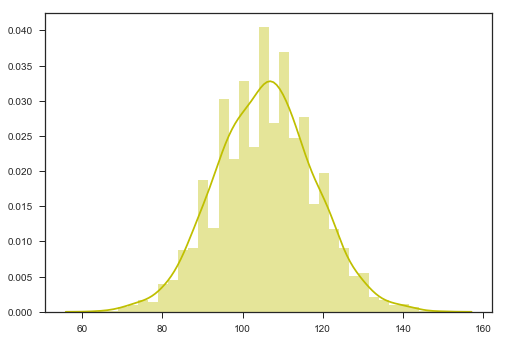

In [175]:
x = df['PTS'].values
sns.distplot(x, color="y")

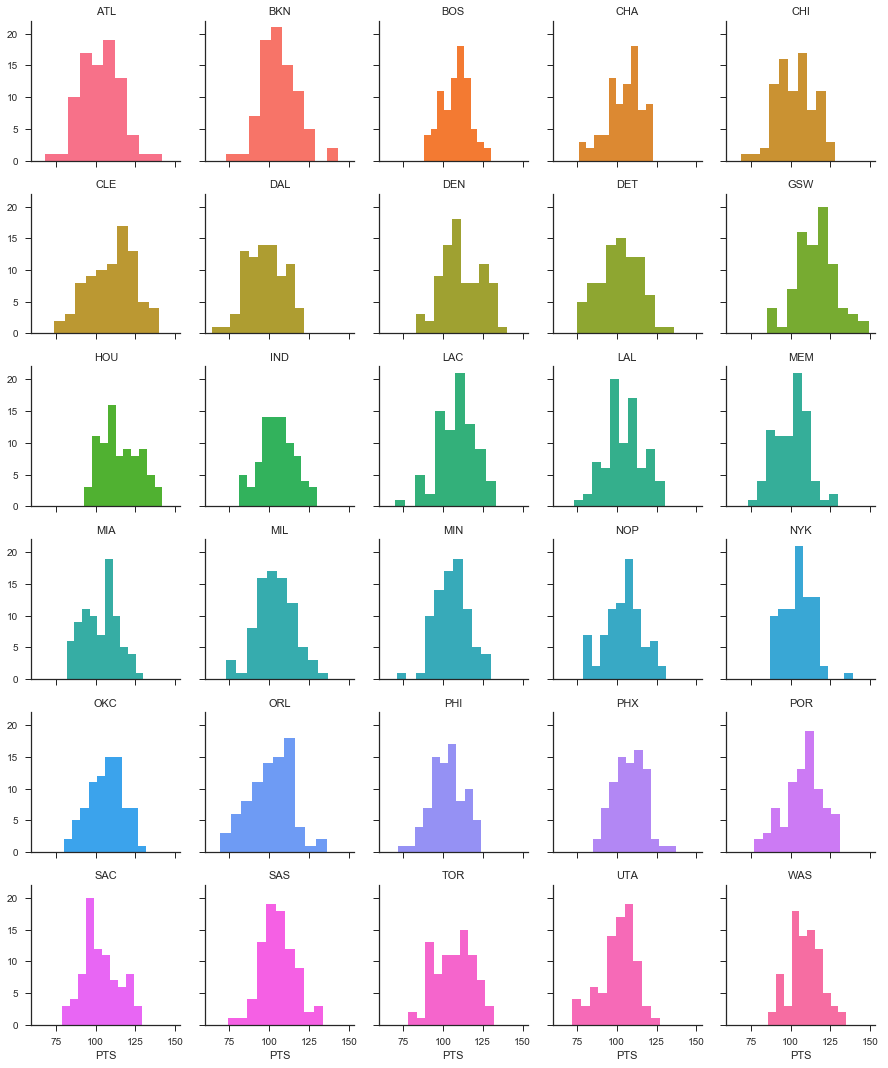

In [7]:
g = sns.FacetGrid(data=df, col="TEAM", hue="TEAM", col_wrap=5, size=2.5)
g = (g.map(plt.hist, "PTS")).set_titles("{col_name}")

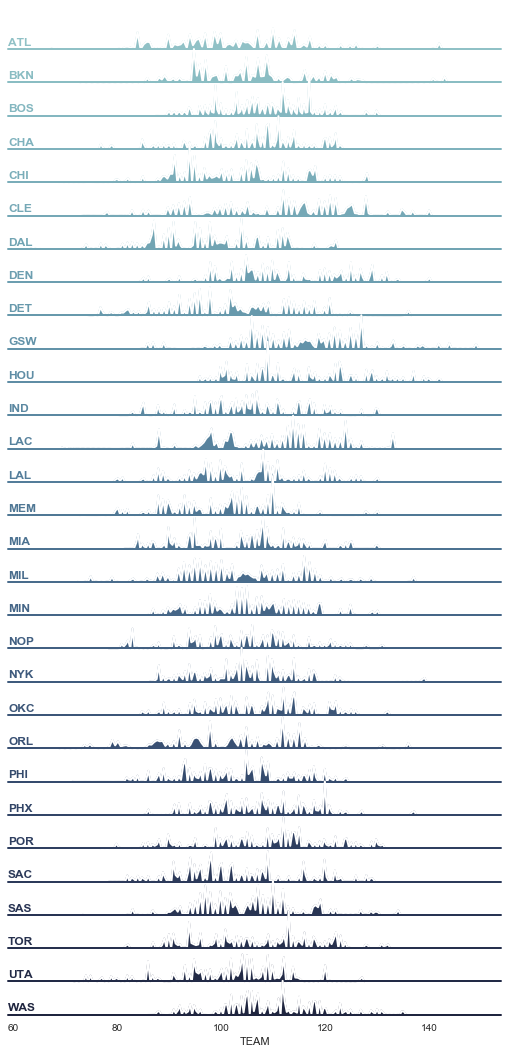

In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# # Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(30, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="TEAM", hue="TEAM", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "PTS", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "PTS", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "TEAM")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

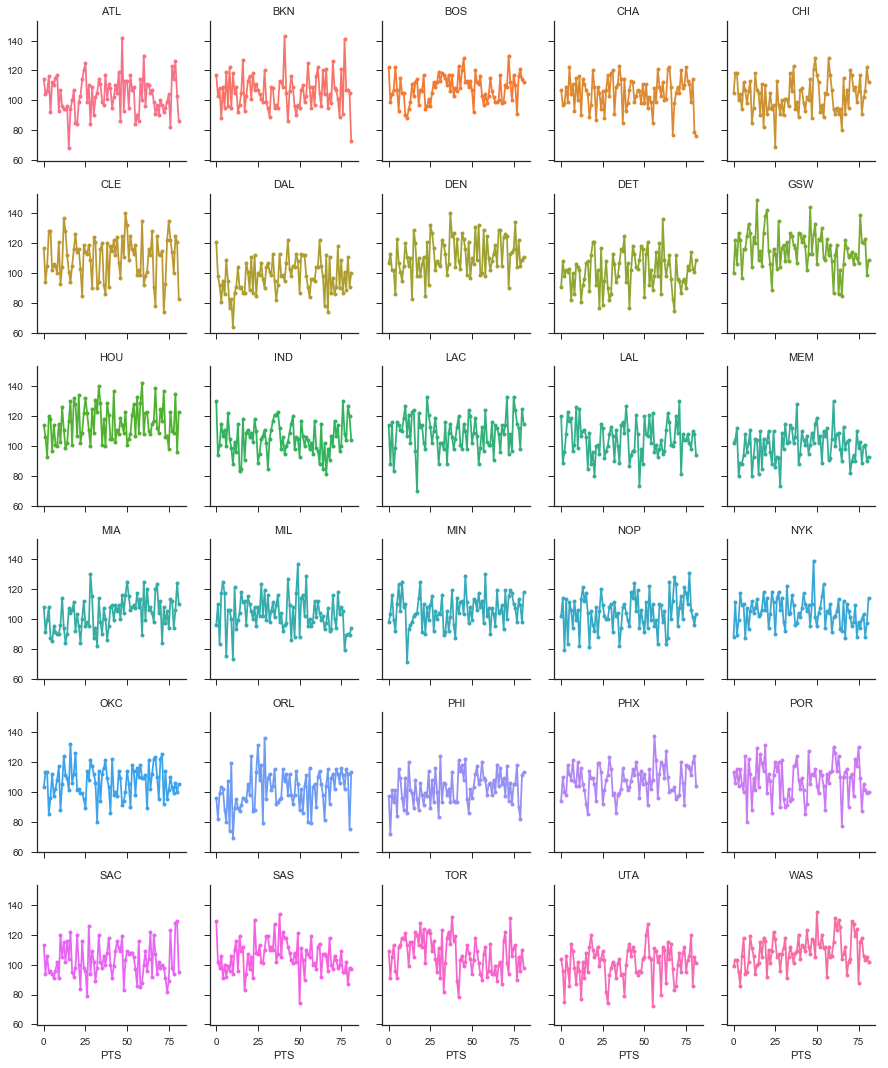

In [9]:
g_2 = sns.FacetGrid(data=df, col="TEAM",hue="TEAM", col_wrap=5, size=2.5)
g_2 = (g_2.map(plt.plot,"PTS", marker="o", ms=4)).set_titles("{col_name}")
g_2.fig.tight_layout(w_pad=1)

#### Clustering Teams by Playtype

In [20]:
df = pd.read_csv('1617_Teams_Reg_FF.csv', encoding = 'latin1')
del df['GP']
del df['W']
del df['L']
del df['MIN']
df.head(10)

,STANDING,TEAM,WIN%,EFG%,FTA RATE,TOV%,OREB%,OPP EFG%,OPP FTA RATE,OPP TOV%,OPP OREB%
0,1,Golden State Warriors,0.817,56.3,0.259,14.4,22.8,48.6,0.261,15.0,25.1
1,2,San Antonio Spurs,0.744,52.4,0.263,13.9,24.0,49.2,0.249,14.8,22.4
2,3,Houston Rockets,0.671,54.5,0.304,14.7,24.6,51.9,0.250,14.6,24.2
3,4,Boston Celtics,0.646,52.5,0.273,13.3,21.2,50.3,0.290,13.9,24.7
4,5,Utah Jazz,0.622,52.6,0.288,14.5,23.2,49.3,0.253,12.9,21.1
5,5,Toronto Raptors,0.622,51.7,0.293,13.0,25.0,50.7,0.286,14.9,23.7
6,5,Cleveland Cavaliers,0.622,54.7,0.275,13.7,21.9,51.6,0.226,12.7,24.2
7,5,LA Clippers,0.622,53.7,0.312,13.1,21.5,50.6,0.274,13.4,23.1
8,9,Washington Wizards,0.598,52.8,0.254,14.1,24.1,52.4,0.284,15.3,24.5
9,10,Oklahoma City Thunder,0.573,50.0,0.295,14.8,27.9,51.1,0.285,13.7,21.0


In [96]:
A=df.as_matrix()
type(A)


numpy.ndarray

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import colors


In [98]:
import matplotlib.pyplot as plt

#from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#iris = datasets.load_iris()
A=df.as_matrix()
#type(A)

#Target
names = A[:, 1]
#Remove targets from input data
#A = A[:, 1:]
#y

X = A[:,2:]

# X = iris.data
# y = iris.target
target_names = t

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))



explained variance ratio (first two components): [ 0.42984241  0.25014183]


In [99]:
X_r

array([[-1.76978311,  5.46442499],
       [ 0.33482971,  1.04153722],
       [ 0.66490414,  3.24608801],
       [-2.48276787,  1.24835677],
       [-0.24593232,  0.3105475 ],
       [ 1.36476997,  0.80648407],
       [-2.0372104 ,  2.54249436],
       [-2.32231549,  1.30590298],
       [ 0.44451171,  1.79459002],
       [ 4.95594613, -1.13684695],
       [ 1.8188941 , -1.74234559],
       [ 0.54738334,  0.22137319],
       [-2.21273904,  0.49272014],
       [-2.05493988,  1.43921605],
       [ 4.08066177, -1.38116111],
       [-0.42383821,  0.29670549],
       [ 0.7460452 ,  0.48876438],
       [ 3.95884552,  0.58576714],
       [ 1.32801409, -4.3132664 ],
       [-3.01433718, -3.84814105],
       [-4.60315257, -1.93024182],
       [-4.92276025, -2.57754642],
       [-2.10359633, -0.16387759],
       [ 3.95176113,  0.59222177],
       [ 3.42178449,  0.4281409 ],
       [-1.07097438, -3.06889329],
       [-0.4696067 ,  0.13726416],
       [ 2.14362523, -0.61461737],
       [ 3.18269601,

In [100]:
import numpy as np
from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=3).fit(X)

In [ ]:
# plt.figure()
# colors = ['navy', 'turquoise', 'darkorange']
# lw = 2

# # for color, i, target_name in zip(colors, [0, 1, 2], target_names):
# #     plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
# #                 label=target_name)
    
# for color, i, target_name in zip(colors, y, target_names):
#     print('**********')
#     print(X_r[y==i,0])
#     plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
#                 label=target_name)
    
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('PCA of Teams')

# # plt.figure()
# # for color, i, target_name in zip(colors, [0, 1, 2], target_names):
# #     plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
# #                 label=target_name)
# # plt.legend(loc='best', shadow=False, scatterpoints=1)
# # plt.title('LDA of IRIS dataset')

# plt.show()

In [136]:
import numpy as np
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X_r)
y = kmeans.predict(X_r)

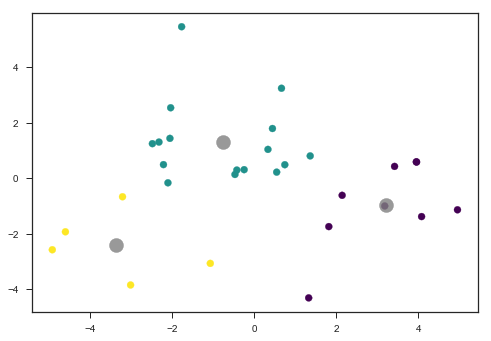

In [137]:
centers = kmeans.cluster_centers_
plt.scatter(X_r[:,0], X_r[:,1], c=y, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='grey', s=200, alpha=.8)

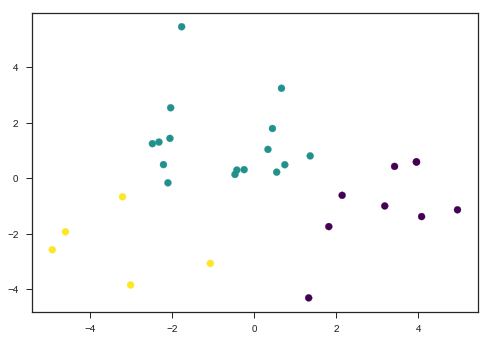

In [138]:
centers = kmeans.cluster_centers_
fig, ax = plt.subplots()
ax.scatter(X_r[:,0], X_r[:,1], c=y, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='grey', s=200, alpha=.8)

In [103]:
better_t = df['TEAM'].tolist()

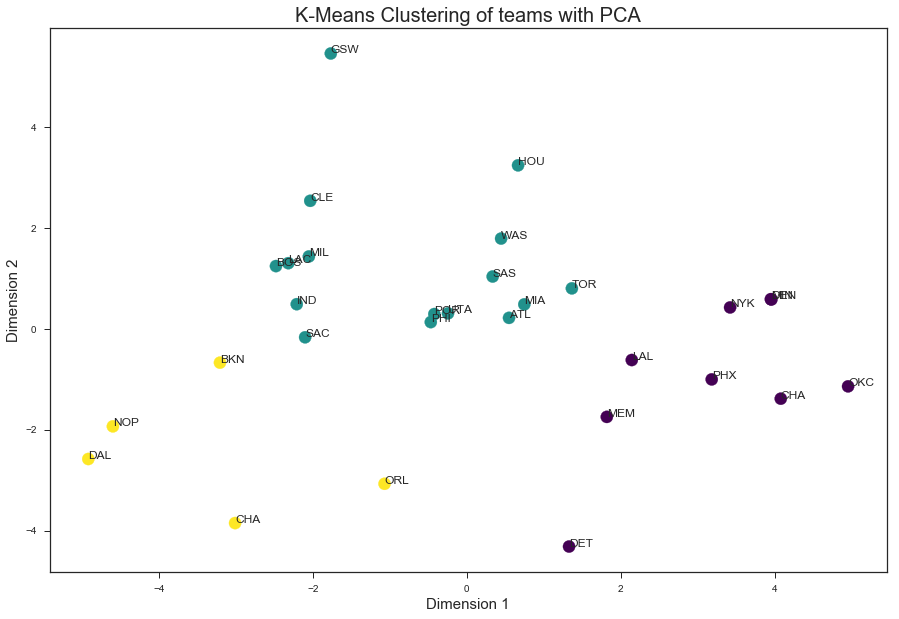

In [161]:
a = X_r[:,0]
b = X_r[:,1]


#centers = kmeans.cluster_centers_
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(a, b, c=y, cmap='viridis', s=150)
ax.set_title('K-Means Clustering of teams with PCA', fontsize=20)
ax.set_xlabel('Dimension 1', fontsize=15)
ax.set_ylabel('Dimension 2', fontsize=15)

#ax.scatter(centers[:, 0], centers[:, 1], c='grey', s=200, alpha=.8)

for i,txt in enumerate(best_t):
    ax.annotate(txt, (a[i],b[i]))



In [162]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1,
       0, 0, 2, 1, 0, 0, 2], dtype=int32)

In [164]:
len(y)

30

In [167]:
list_0=[]
list_1=[]
list_2=[]
for i in range(30):
    if y[i] == 0:
        list_0.append(best_t[i])
    elif y[i] == 1:
        list_1.append(best_t[i])
    elif y[i] == 2:
        list_2.append(best_t[i])

In [168]:
list_0

['OKC', 'MEM', 'CHA', 'DEN', 'DET', 'MIN', 'NYK', 'LAL', 'PHX']

In [169]:
list_1

['GSW',
 'SAS',
 'HOU',
 'BOS',
 'UTA',
 'TOR',
 'CLE',
 'LAC',
 'WAS',
 'ATL',
 'IND',
 'MIL',
 'POR',
 'MIA',
 'SAC',
 'PHI']

In [170]:
list_2

['CHA', 'NOP', 'DAL', 'ORL', 'BKN']

In [171]:
len(list_0)+len(list_1)+len(list_2)

30

In [ ]:
list_0=[]
for i in range(30):
    if y[i] == 0:
        list_0.append(best_t[i])

In [140]:
print(better_t)

['Golden State Warriors', 'San Antonio Spurs', 'Houston Rockets', 'Boston Celtics', 'Utah Jazz', 'Toronto Raptors', 'Cleveland Cavaliers', 'LA Clippers', 'Washington Wizards', 'Oklahoma City Thunder', 'Memphis Grizzlies', 'Atlanta Hawks', 'Indiana Pacers', 'Milwaukee Bucks', 'Chicago Bulls', 'Portland Trail Blazers', 'Miami Heat', 'Denver Nuggets', 'Detroit Pistons', 'Charlotte Hornets', 'New Orleans Pelicans', 'Dallas Mavericks', 'Sacramento Kings', 'Minnesota Timberwolves', 'New York Knicks', 'Orlando Magic', 'Philadelphia 76ers', 'Los Angeles Lakers', 'Phoenix Suns', 'Brooklyn Nets']


In [75]:
y=[2.56422, 3.77284,3.52623,3.51468,3.02199]
z=[0.15, 0.3, 0.45, 0.6, 0.75]
n=[58,651,393,203,123]

type(n)

list

In [74]:
{i:X[np.where(kmeans.labels_ == i)] for i in range(kmeans.n_clusters)}

{0: array([[56.3, 0.259, 14.4, 22.8],
        [52.4, 0.263, 13.9, 24.0],
        [54.5, 0.304, 14.7, 24.6],
        [52.6, 0.28800000000000003, 14.5, 23.2],
        [54.7, 0.275, 13.7, 21.9],
        [53.7, 0.312, 13.1, 21.5],
        [52.8, 0.254, 14.1, 24.1],
        [52.7, 0.274, 14.4, 21.5],
        [52.0, 0.275, 13.7, 23.0]], dtype=object),
 1: array([[51.7, 0.293, 13.0, 25.0],
        [50.0, 0.295, 14.8, 27.9],
        [49.1, 0.28, 13.5, 24.8],
        [50.4, 0.295, 15.7, 23.6],
        [48.7, 0.259, 13.8, 27.0],
        [51.2, 0.251, 13.7, 24.2],
        [53.0, 0.276, 14.7, 27.3],
        [49.2, 0.218, 12.1, 24.1],
        [51.1, 0.287, 14.4, 27.2],
        [49.6, 0.239, 13.9, 26.6],
        [50.1, 0.259, 15.0, 25.0],
        [49.3, 0.297, 14.9, 26.0]], dtype=object),
 2: array([[52.5, 0.273, 13.3, 21.2],
        [51.6, 0.261, 13.9, 21.2],
        [50.1, 0.279, 11.7, 19.9],
        [50.4, 0.256, 12.7, 18.5],
        [50.5, 0.225, 12.6, 18.1],
        [51.6, 0.284, 14.9, 21.0],
 

In [141]:
best_t = ['GSW', 'SAS', 'HOU', 'BOS', 'UTA', 'TOR', 'CLE', 'LAC', 'WAS', 'OKC', 'MEM', 'ATL', 'IND', 'MIL', 'CHA', 'POR',
'MIA', 'DEN', 'DET', 'CHA', 'NOP', 'DAL', 'SAC', 'MIN', 'NYK', 'ORL', 'PHI', 'LAL', 'PHX', 'BKN']

In [180]:
df = pd.read_csv('1617_AllGames_byTeam.csv', encoding = 'latin1', index_col=0)

In [181]:
df.head()

,TEAM,OPP,Home/Away,WIN,GAME DATE,REST,OPP_REST,MIN,PTS,FGM,...,OPP_FTA,OPP_FT%,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_PF
0,ATL,WAS,1,1,10/27/2016,0,0,48,114,44,...,18,72.2,12,28,40,25,19,14,4,20
1,ATL,PHI,0,0,10/29/2016,2,3,48,104,42,...,15,73.3,4,35,39,16,20,9,5,20
2,ATL,SAC,1,1,10/31/2016,2,2,48,106,33,...,19,68.4,6,32,38,26,19,10,6,34
3,ATL,LAL,1,1,11/02/2016,2,1,48,116,41,...,20,90.0,11,31,42,24,15,11,9,25
4,ATL,WAS,0,0,11/04/2016,2,2,48,92,32,...,35,80.0,11,35,46,13,19,7,3,23


In [182]:
L0 =  ['OKC', 'MEM', 'CHA', 'DEN', 'DET', 'MIN', 'NYK', 'LAL', 'PHX']
L1 = ['GSW','SAS','HOU','BOS','UTA','TOR','CLE','LAC','WAS','ATL','IND','MIL','POR','MIA','SAC','PHI']
L2 = ['CHA', 'NOP', 'DAL', 'ORL', 'BKN']

In [194]:
type_list = []

for i in range(len(df['TEAM'])):
    if df['TEAM'][i] in L0 and df['OPP'][i] in L0:
        type_list.append(1)
    elif df['TEAM'][i] in L1 and df['OPP'][i] in L1:
        type_list.append(1)
    elif df['TEAM'][i] in L2 and df['OPP'][i] in L2:
        type_list.append(1)
    else:
        type_list.append(0)
            

In [195]:
type_list

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [196]:
df['SAME TYPE'] = type_list

In [197]:
df.head()

,TEAM,OPP,Home/Away,WIN,GAME DATE,REST,OPP_REST,MIN,PTS,FGM,...,OPP_FT%,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_PF,SAME TYPE
0,ATL,WAS,1,1,10/27/2016,0,0,48,114,44,...,72.2,12,28,40,25,19,14,4,20,1
1,ATL,PHI,0,0,10/29/2016,2,3,48,104,42,...,73.3,4,35,39,16,20,9,5,20,1
2,ATL,SAC,1,1,10/31/2016,2,2,48,106,33,...,68.4,6,32,38,26,19,10,6,34,1
3,ATL,LAL,1,1,11/02/2016,2,1,48,116,41,...,90.0,11,31,42,24,15,11,9,25,0
4,ATL,WAS,0,0,11/04/2016,2,2,48,92,32,...,80.0,11,35,46,13,19,7,3,23,1


In [198]:
df.to_csv('1617_AllGames_byTeam.csv')